In [12]:
import json
import pandas
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
with open('data/5f9c1aba-2701-44b9-98f8-41d45255ef1d.json') as f:
    d = json.load(f)

context = d["context"]
context

{u'date': u'2019-06-15T13:46:00.357072',
 u'machine': {u'core-count': 2,
  u'frequency': 3000.0,
  u'host': u'don-Inspiron-7537',
  u'memory': 8257839104,
  u'thread-count': 4},
 u'user': u'don',
 u'version': {u'sha1': u'ccf1dbb139c2666a6fd7a39e52b5042c17f5c922',
  u'tag': u'0.10.0'}}

In [3]:
tests = d["tests"]
print tests

dataFrame = pandas.DataFrame(tests)
dataFrame

{u'test1': [1, 2, 2, 4], u'test2': [5, 5.1, 4.9, 4.0], u'test4': [21.1, 20.5, 30.0, 22.0]}


,test1,test2,test4
0,1,5.0,21.1
1,2,5.1,20.5
2,2,4.9,30.0
3,4,4.0,22.0


In [4]:
series_standarddev = dataFrame.std()
series_standarddev

test1    1.258306
test2    0.506623
test4    4.442972
dtype: float64

In [5]:
series_mean = dataFrame.mean()
series_mean

test1     2.25
test2     4.75
test4    23.40
dtype: float64

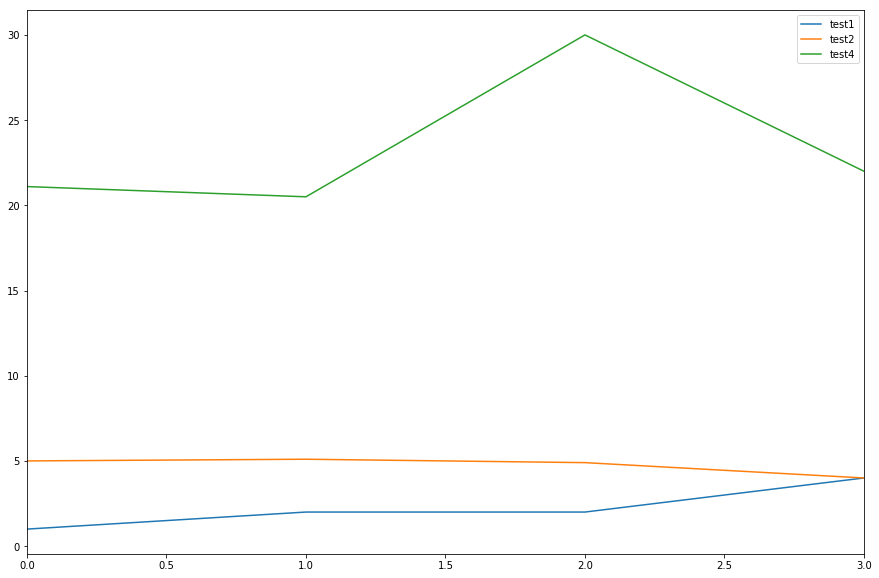

In [13]:
plot = dataFrame.plot()
plot

In [7]:
 pandas.DataFrame({"mean": series_mean, "std": series_standarddev})

,mean,std
test1,2.25,1.258306
test2,4.75,0.506623
test4,23.40,4.442972


In [8]:
import glob
import json
import pandas
import matplotlib

def make_frame(path):
    with open(path) as f:
        d = json.load(f)
    
    tests = d["tests"]
    context = d["context"]
    
    dataFrame = pandas.DataFrame(tests)
    series_standarddev = dataFrame.std()
    series_mean = dataFrame.mean()
    frame = pandas.DataFrame({"mean": series_mean, "std": series_standarddev})
    
    tag = context['version']['tag']
    
    frame.rename(columns={'mean':'mean_[{}]'.format(tag),
                          'std':'std_[{}]'.format(tag),
                          }, 
                 inplace=True)
    
    return (context, frame)
        

data_paths = glob.glob("data/*.json")
current_frame = None

tags = []

for data_path in data_paths:
    context, frame  = make_frame(data_path)
    tag = context['version']['tag']
    tags.append(tag)
    if current_frame is None:
        current_frame = frame
    else:
        current_frame = pandas.merge(current_frame, frame, right_index=True, left_index=True)


data_frame = current_frame
data_frame

,mean_[v0.11.0],std_[v0.11.0],mean_[0.12.0],std_[0.12.0],mean_[0.10.0],std_[0.10.0],mean_[0.8.0],std_[0.8.0]
test1,2.50,1.290994,2.375,1.250000,2.25,1.258306,2.25,1.707825
test2,4.75,0.506623,4.750,0.506623,4.75,0.506623,4.75,0.506623
test4,30.65,13.620695,23.400,4.442972,23.40,4.442972,23.40,4.442972


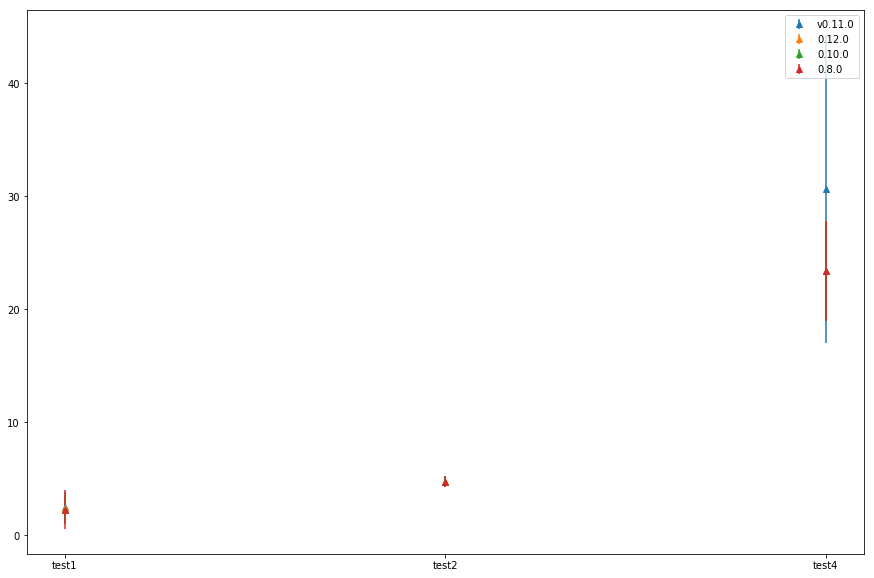

In [18]:
x = data_frame.index.tolist()

handles = []


for tag in tags:
    y = data_frame['mean_[{}]'.format(tag)]
    e = data_frame['std_[{}]'.format(tag)]
        
    handles.append( plt.errorbar(x, y, e, linestyle='None', marker='^', label=tag))

plt.legend(handles=handles)
plt.savefig('report_output.png')
plt.show()



In [44]:
import jinja2
from IPython.core.display import HTML
from IPython.display import IFrame

env = jinja2.Environment(
    loader=jinja2.FileSystemLoader('./report_template'),
    autoescape=jinja2.select_autoescape(['html', 'xml'])
                        )

template = env.get_template('report_template.html')
html = template.render(username='don')
with open("report-output.html", 'w') as f:
    f.write(html)

IFrame(src='./report-output.html', width=700, height=600)
